In [1]:
import pandas as pd
import re


In [2]:

def extract_pad(well):
    # If well starts with 2 digits and 1 letter (e.g. '15W'), pad = '1' + digits (-> '115')
    m1 = re.match(r'^(\d{2})([A-Za-z])', well)
    if m1:
        return '1' + m1.group(1)
    # If well starts with 2 digits, 2 letters, and 1 digit (e.g. '7WP'), pad = '1' + digits (-> '107')
    m2 = re.match(r'^(\d)([A-Za-z]{2})', well)
    if m2:
        return '10' + m2.group(1)
    # If well starts with 2 digits, 1 letter, 1 letter, and 1 digit (e.g. '16W'), pad = '1' + digits (-> '116')
    m3 = re.match(r'^(\d{2})([A-Za-z]{1})', well)
    if m3:
        return '1' + m3.group(1)
    # If well starts with 3 digits (e.g. '106W13'), pad = those digits
    m4 = re.match(r'^(\d{3})', well)
    if m4:
        return m4.group(1)
    # Otherwise, fallback to first 3 chars
    return well[:3]

In [3]:

def filter_target_pads(df, target_pads=None):
    """
    Returns a DataFrame filtered to only include rows with pad in target_pads.
    Pads are strings, e.g. ['105', '106', '107', '108', '116']
    """
    if target_pads is None:
        target_pads = ['105', '106', '107', '108', '116']
    return df[df['pad'].astype(str).isin(target_pads)].reset_index(drop=True)


In [4]:
# Load the CSV file into a DataFrame
df_event_pg = pd.read_csv('well_event_pg_values.csv', parse_dates=['timestamp'])
df_event_pg['pad'] = df_event_pg['well'].apply(extract_pad)


In [5]:
df_event_pg['pad'].unique()

array(['101', '102', '103', '104', '109', '131', '105', '106', '107',
       '108', '118', '123', '110', '114', '115', '116', '117', '121'],
      dtype=object)

In [6]:

# Check the unique pads
print("Pads in data:", df_event_pg['pad'].unique())

# Create a dictionary of DataFrames, one per pad
pad_dfs = {}
for pad in df_event_pg['pad'].unique():
    pad_dfs[pad] = df_event_pg[df_event_pg['pad'] == pad].reset_index(drop=True)

# Example: show the first few rows for each pad
for pad, df in pad_dfs.items():
    print(f"\nPad: {pad}")
    print(df.head())

Pads in data: ['101' '102' '103' '104' '109' '131' '105' '106' '107' '108' '118' '123'
 '110' '114' '115' '116' '117' '121']

Pad: 101
   pad    well       event_type           timestamp  pad_pg_value
0  101  101N01  101N01 +2.16 hz 2025-08-11 23:37:00     -0.075807
1  101  101N01  101N01 +2.11 hz 2025-08-12 02:07:00    145.449478
2  101  101N01  101N01 +2.22 hz 2025-08-13 06:01:00    118.137741
3  101  101N01  101N01 +2.05 hz 2025-08-15 03:01:00    132.282852
4  101  101N01  101N01 +2.39 hz 2025-08-16 04:19:00      0.030052

Pad: 102
   pad    well       event_type           timestamp  pad_pg_value
0  102  102N01     102N01 start 2025-08-11 13:25:00    128.996918
1  102  102N07       102N07 NFE 2025-08-13 19:07:00    160.089569
2  102  102N07       102N07 NFE 2025-08-18 16:31:00     -0.075807
3  102  102N08       102N08 NFE 2025-08-15 14:31:00    124.948509
4  102  102N08  102N08 +7.96 hz 2025-08-16 08:01:00     -0.074377

Pad: 103
   pad    well       event_type           timestamp  

In [7]:
# Show a quick summary for each pad's DataFrame
for pad, df in pad_dfs.items():
    print(f"\nPad: {pad}")
    print(df.describe(include='all'))
    print(df.info())


Pad: 101
        pad    well       event_type                      timestamp  \
count    13      13               13                             13   
unique    1       4               13                            NaN   
top     101  101N01  101N01 +2.16 hz                            NaN   
freq     13       5                1                            NaN   
mean    NaN     NaN              NaN  2025-08-16 07:25:55.384615424   
min     NaN     NaN              NaN            2025-08-11 23:37:00   
25%     NaN     NaN              NaN            2025-08-15 00:37:00   
50%     NaN     NaN              NaN            2025-08-16 04:19:00   
75%     NaN     NaN              NaN            2025-08-19 09:55:00   
max     NaN     NaN              NaN            2025-08-20 10:37:00   
std     NaN     NaN              NaN                            NaN   

        pad_pg_value  
count      13.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      102.358078  

In [8]:
df_target_pads = filter_target_pads(df_event_pg)
print("Pads in filtered data:", df_target_pads['pad'].unique())
print(df_target_pads.head())

Pads in filtered data: ['105' '106' '107' '108' '116']
   pad    well        event_type           timestamp  pad_pg_value
0  105  105N01        105N01 NFE 2025-08-16 13:55:00    136.892029
1  105  105N01  105N01 +15.98 hz 2025-08-16 19:49:00    144.495316
2  105  105N01       105N01 trip 2025-08-16 21:31:00    144.498169
3  105  105N01      105N01 start 2025-08-17 07:31:00    164.150833
4  105  105N01        105N01 NFE 2025-08-17 12:07:00    109.674698


In [9]:
# df_target_pads['pad'].describe()
# df_target_pads['well'].describe()
# df_target_pads['event_type'].describe()
df_target_pads['pad_pg_value'].describe()


count    248.000000
mean     113.296730
std       55.171213
min       -0.264637
25%      112.981377
50%      127.415466
75%      144.515697
max      197.576675
Name: pad_pg_value, dtype: float64

In [10]:
def estimate_well_pg_from_events(df_pad):
    """
    For a pad's event DataFrame (must include pad_pg_value), 
    estimate well-level PG by attributing PG delta between events to the well that triggered the event.
    Returns a DataFrame: pad, well, event_type, timestamp, delta_pg, pg_before, pg_after
    """
    results = []
    events = df_pad.sort_values('timestamp').reset_index(drop=True)
    for i, row in events.iterrows():
        well = row['well']
        event_type = row['event_type']
        ts = row['timestamp']
        pg_before = row['pad_pg_value']
        # Find PG value at next event (or None if last event)
        if i + 1 < len(events):
            pg_after = events.loc[i + 1, 'pad_pg_value']
        else:
            pg_after = None
        # Calculate delta PG (change in pad PG between events)
        delta_pg = pg_after - pg_before if pg_after is not None else None
        results.append({
            'pad': row['pad'],
            'well': well,
            'event_type': event_type,
            'timestamp': ts,
            'pg_before': pg_before,
            'pg_after': pg_after,
            'delta_pg': delta_pg
        })
    return pd.DataFrame(results)



In [11]:

# Apply for each pad in your filtered DataFrame
well_pg_records = []
for pad in df_target_pads['pad'].unique():
    df_pad_events = df_target_pads[df_target_pads['pad'] == pad].sort_values('timestamp').reset_index(drop=True)
    df_est_pg = estimate_well_pg_from_events(df_pad_events)
    well_pg_records.append(df_est_pg)

df_well_pg = pd.concat(well_pg_records).reset_index(drop=True)
print(df_well_pg.head())

# Save to CSV
df_well_pg.to_csv('estimated_well_pg.csv', index=False)
print("Saved estimated well PG values to estimated_well_pg.csv")


   pad    well    event_type           timestamp   pg_before    pg_after  \
0  105  105W03    105W03 NFE 2025-08-11 13:49:00  132.743500   -0.105848   
1  105  105W18  105W18 start 2025-08-11 16:31:00   -0.105848   -0.105848   
2  105  105W14  105W14 start 2025-08-11 16:31:00   -0.105848  118.695648   
3  105  105W14   105W14 trip 2025-08-11 17:07:00  118.695648  133.371109   
4  105  105W03   105W03 trip 2025-08-11 18:25:00  133.371109  150.343338   

     delta_pg  
0 -132.849348  
1    0.000000  
2  118.801496  
3   14.675461  
4   16.972229  
Saved estimated well PG values to estimated_well_pg.csv


In [12]:
df_well_pg.describe()

,timestamp,pg_before,pg_after,delta_pg
count,248,248.000000,243.000000,243.000000
mean,2025-08-15 17:05:05.322580480,113.296730,113.441053,0.977048
min,2025-08-11 06:01:00,-0.264637,-0.264637,-185.112432
25%,2025-08-12 22:26:30,112.981377,113.200970,-24.935631
50%,2025-08-15 19:43:00,127.415466,127.503448,0.000000
75%,2025-08-18 01:19:00,144.515697,144.533226,27.304588
max,2025-08-20 11:25:00,197.576675,197.576675,197.683954
std,NaN,55.171213,55.171329,79.550064


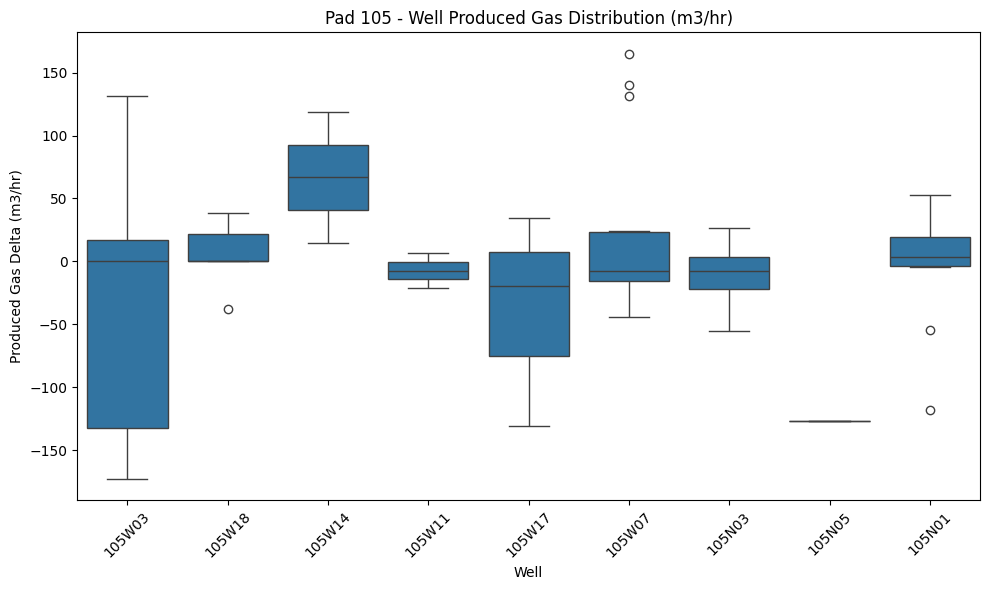


Pad 105 - Well PG Stats (m3/hr):
     well         min         max        mean
0  105N01 -118.535426   53.118576   -4.651664
1  105N03  -55.702095   26.384773  -11.128115
2  105N05 -126.763832 -126.763832 -126.763832
3  105W03 -172.734021  131.114087  -31.499411
4  105W07  -44.388016  165.203699   23.592965
5  105W11  -20.978767    6.467445   -7.255661
6  105W14   14.675461  118.801496   66.738479
7  105W17 -131.165595   34.555954  -38.829918
8  105W18  -37.718872   38.521393    4.468411


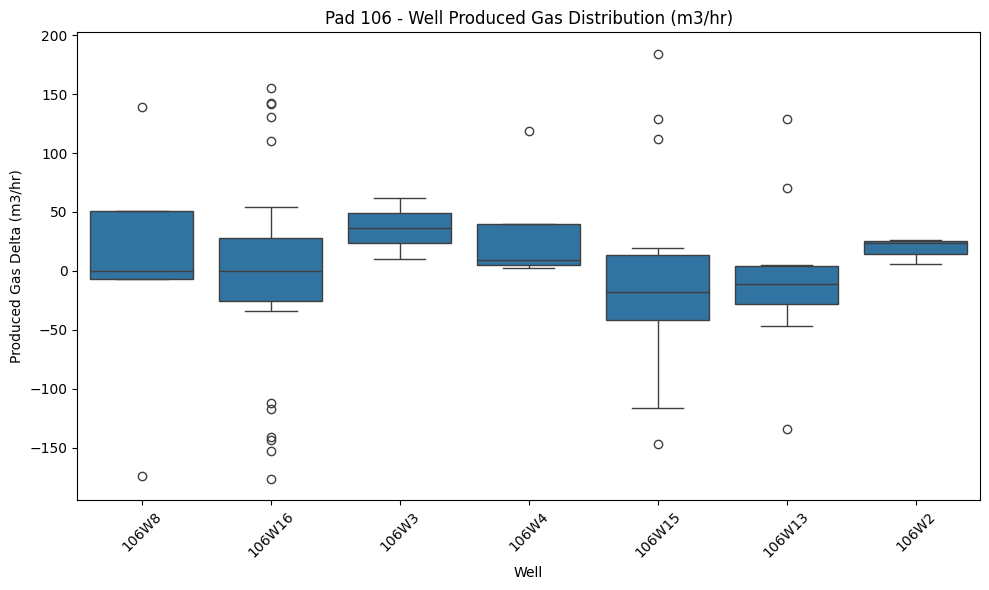


Pad 106 - Well PG Stats (m3/hr):
     well         min         max       mean
0  106W13 -133.970865  128.682192  -4.639346
1  106W15 -146.759832  184.358543  -2.434016
2  106W16 -176.082907  154.989690  -0.305054
3   106W2    5.613419   26.586472  18.711375
4   106W3   10.490097   62.073700  36.281898
5   106W4    2.088562  118.714239  34.951375
6   106W8 -174.323354  138.768884   1.676868


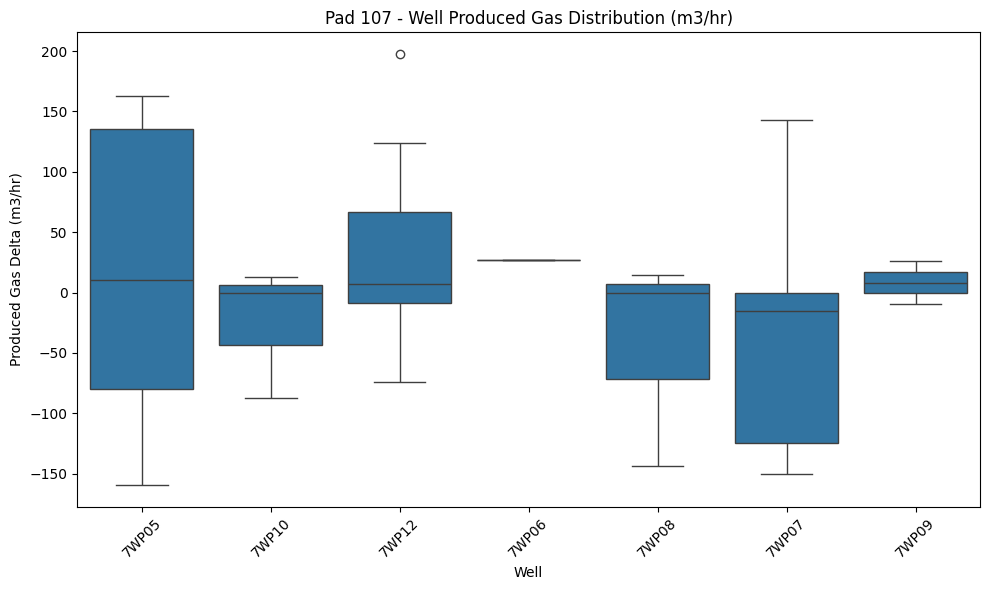


Pad 107 - Well PG Stats (m3/hr):
    well         min         max       mean
0  7WP05 -159.438635  163.165197  13.686390
1  7WP06   27.274551   27.274551  27.274551
2  7WP07 -150.673773  142.900269 -30.066152
3  7WP08 -143.911646   14.838936 -43.024237
4  7WP09   -9.832062   26.291748   8.229843
5  7WP10  -87.362663   13.065048 -24.765872
6  7WP12  -74.117355  197.683954  35.159646


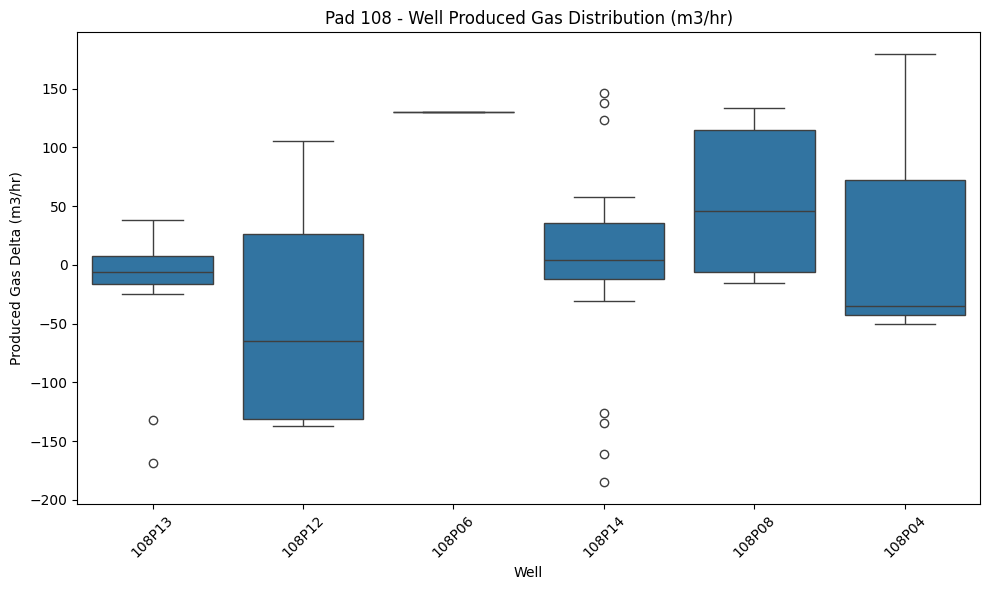


Pad 108 - Well PG Stats (m3/hr):
     well         min         max        mean
0  108P04  -50.410553  179.634923   31.410702
1  108P06  130.374516  130.374516  130.374516
2  108P08  -15.222321  133.071069   54.571984
3  108P12 -137.468529  105.587654  -40.247698
4  108P13 -168.631271   38.139458  -25.771838
5  108P14 -185.112432  145.911535   -2.890495


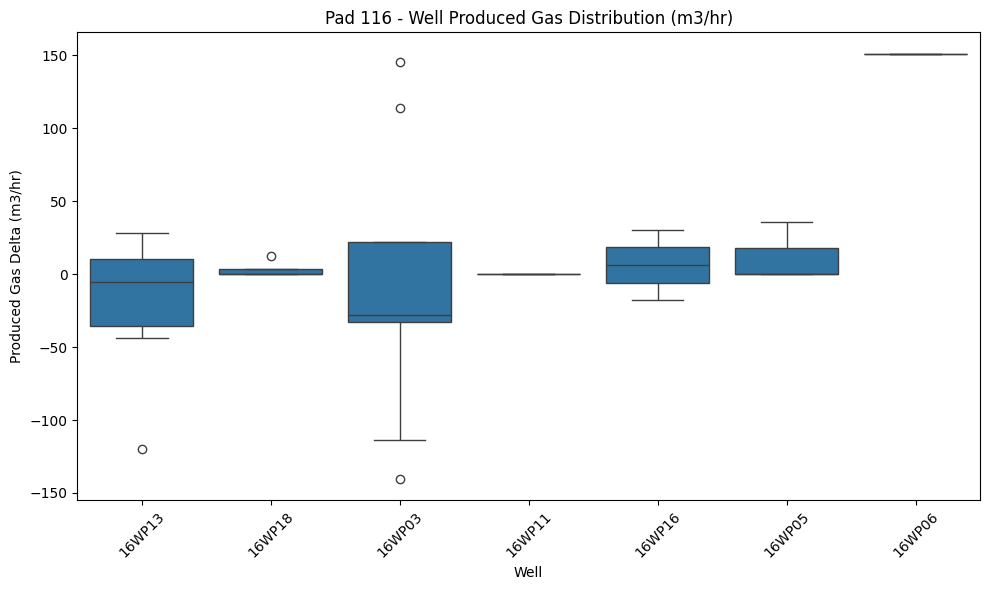


Pad 116 - Well PG Stats (m3/hr):
     well         min         max        mean
0  16WP03 -140.303839  145.315000   -5.319040
1  16WP05    0.000000   35.441467   11.850538
2  16WP06  151.118658  151.118658  151.118658
3  16WP11    0.000000    0.000000    0.000000
4  16WP13 -119.984547   28.227272  -22.178034
5  16WP16  -18.013283   30.494682    6.240700
6  16WP18    0.000000   12.703140    3.175785


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each pad's wells
for pad in df_well_pg['pad'].unique():
    df_pad = df_well_pg[df_well_pg['pad'] == pad]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='well', y='delta_pg', data=df_pad)
    plt.title(f'Pad {pad} - Well Produced Gas Distribution (m3/hr)')
    plt.ylabel('Produced Gas Delta (m3/hr)')
    plt.xlabel('Well')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Table of min, max, avg for each well
    stats = df_pad.groupby('well')['delta_pg'].agg(['min', 'max', 'mean']).reset_index()
    print(f"\nPad {pad} - Well PG Stats (m3/hr):")
    print(stats)



In [14]:
# ...existing code...

def estimate_well_pg_actual(df_pad):
    """
    For each event, attribute the pad PG value to the well:
    - For 'trip' or 'NFE', use pg_before (well was producing)
    - For 'start', use pg_after (well is now producing)
    Returns a DataFrame: pad, well, event_type, timestamp, produced_gas_value
    """
    results = []
    events = df_pad.sort_values('timestamp').reset_index(drop=True)
    for i, row in events.iterrows():
        well = row['well']
        event_type = row['event_type'].lower()
        ts = row['timestamp']
        pg_before = row['pad_pg_value']
        pg_after = events.loc[i + 1, 'pad_pg_value'] if i + 1 < len(events) else None

        if 'trip' in event_type or 'nfe' in event_type:
            produced_gas = pg_before
        elif 'start' in event_type and pg_after is not None:
            produced_gas = pg_after
        else:
            produced_gas = None

        results.append({
            'pad': row['pad'],
            'well': well,
            'event_type': row['event_type'],
            'timestamp': ts,
            'produced_gas_value': produced_gas
        })
    return pd.DataFrame(results)

# Apply for each pad in your filtered DataFrame
well_pg_records = []
for pad in df_target_pads['pad'].unique():
    df_pad_events = df_target_pads[df_target_pads['pad'] == pad].sort_values('timestamp').reset_index(drop=True)
    df_est_pg = estimate_well_pg_actual(df_pad_events)
    well_pg_records.append(df_est_pg)

df_well_pg_actual = pd.concat(well_pg_records).reset_index(drop=True)
print(df_well_pg_actual.head())

# Save to CSV
df_well_pg_actual.to_csv('well_pg_actual.csv', index=False)
print("Saved well PG actual values to well_pg_actual.csv")

# ...existing code...

   pad    well    event_type           timestamp  produced_gas_value
0  105  105W03    105W03 NFE 2025-08-11 13:49:00          132.743500
1  105  105W18  105W18 start 2025-08-11 16:31:00           -0.105848
2  105  105W14  105W14 start 2025-08-11 16:31:00          118.695648
3  105  105W14   105W14 trip 2025-08-11 17:07:00          118.695648
4  105  105W03   105W03 trip 2025-08-11 18:25:00          133.371109
Saved well PG actual values to well_pg_actual.csv


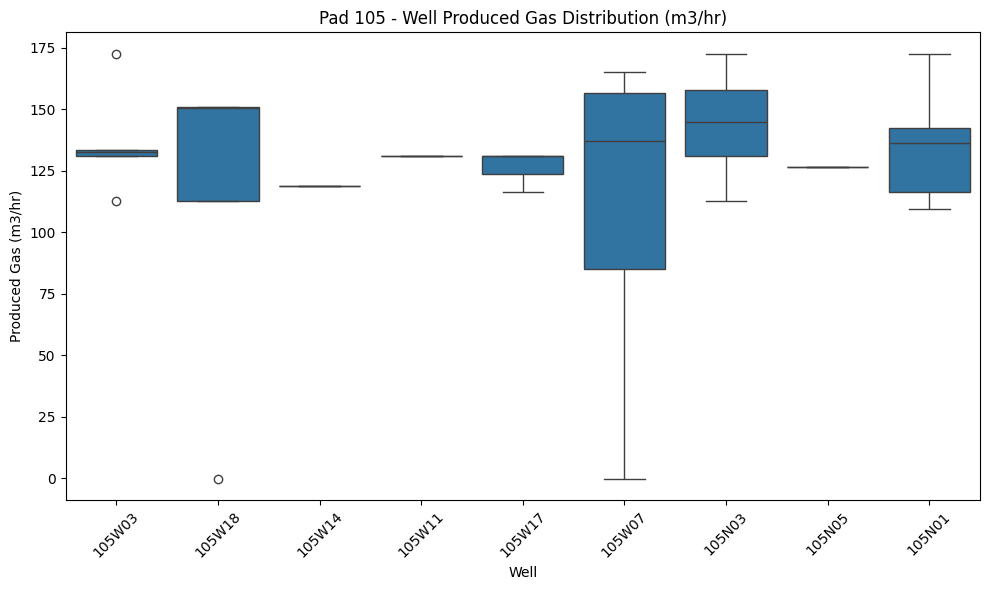


Pad 105 - Well PG Stats (m3/hr):
     well         min         max        mean
0  105N01  109.674698  172.616730  134.874499
1  105N03  112.572960  172.616730  143.832975
2  105N05  126.759552  126.759552  126.759552
3  105W03  112.624466  172.685394  136.497986
4  105W07   -0.070085  165.073532  109.741702
5  105W11  131.065460  131.065460  131.065460
6  105W14  118.695648  118.695648  118.695648
7  105W17  116.554138  131.229980  126.338033
8  105W18   -0.105848  151.145859  113.132302


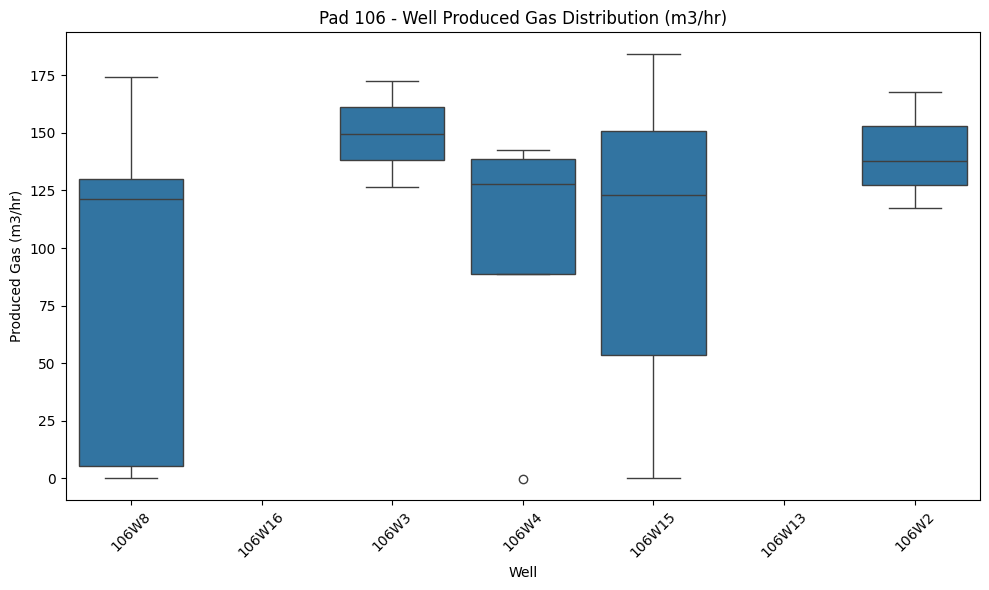


Pad 106 - Well PG Stats (m3/hr):
     well         min         max        mean
0  106W13         NaN         NaN         NaN
1  106W15   -0.074377  184.422928  103.462417
2  106W16         NaN         NaN         NaN
3   106W2  117.412460  167.933167  141.016256
4   106W3  126.520660  172.685394  149.603027
5   106W4   -0.102987  142.593628   99.572508
6   106W8   -0.075807  174.248978   86.152449


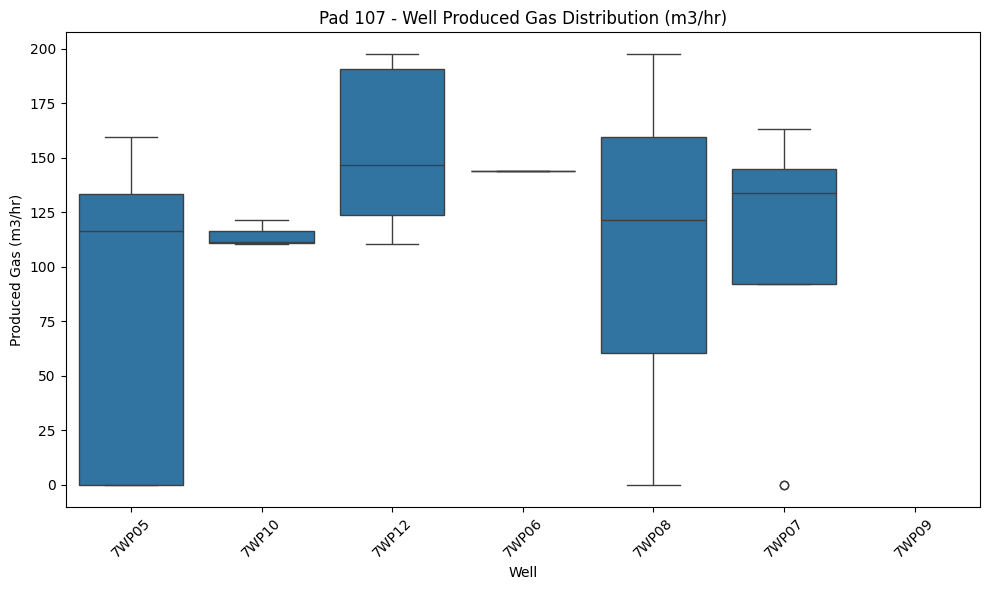


Pad 107 - Well PG Stats (m3/hr):
    well         min         max        mean
0  7WP05   -0.102987  159.335648   83.343695
1  7WP06  143.775757  143.775757  143.775757
2  7WP07   -0.102987  163.062210  105.797782
3  7WP08   -0.135889  197.576675  106.272892
4  7WP09         NaN         NaN         NaN
5  7WP10  110.214012  121.377892  114.221891
6  7WP12  110.214012  197.576675  153.782906


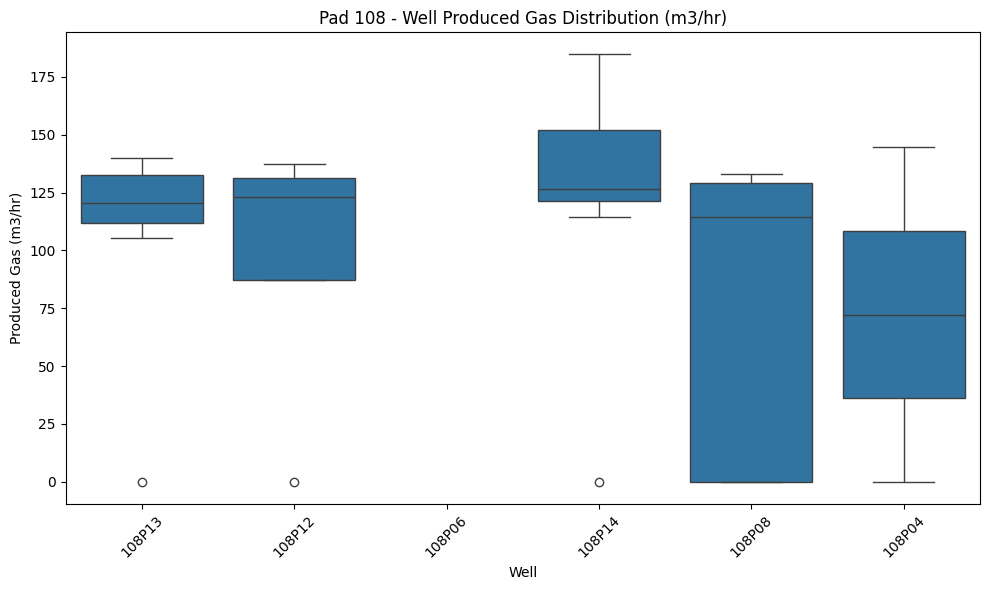


Pad 108 - Well PG Stats (m3/hr):
     well       min         max        mean
0  108P04 -0.074377  144.568283   72.246953
1  108P06       NaN         NaN         NaN
2  108P08 -0.078668  133.021011   75.376525
3  108P12 -0.237457  137.475693   95.784584
4  108P13 -0.237457  140.027771  107.035167
5  108P14  0.007164  185.015167  130.389781


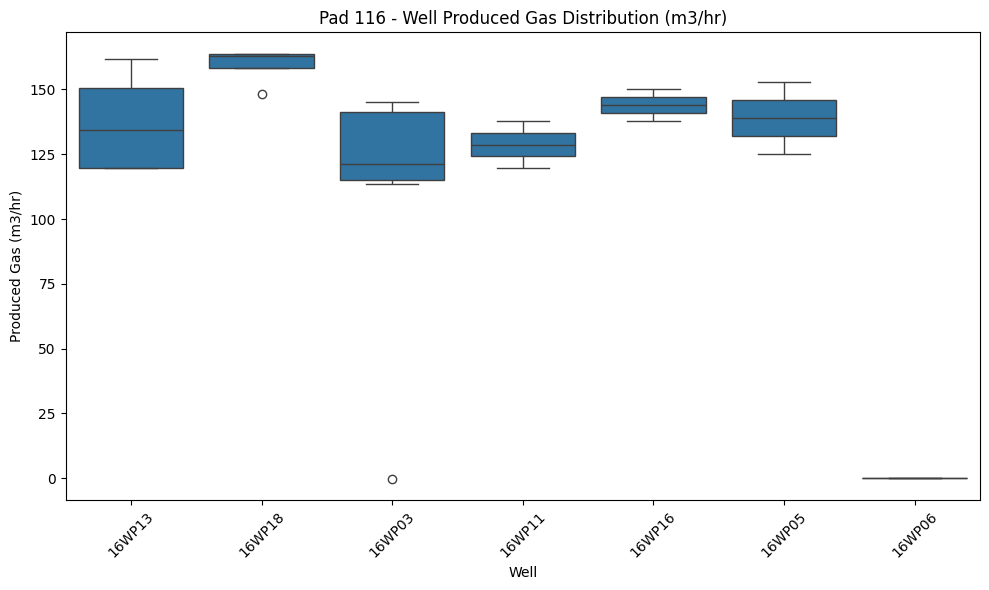


Pad 116 - Well PG Stats (m3/hr):
     well         min         max        mean
0  16WP03   -0.264637  145.266373  112.751068
1  16WP05  124.948509  152.809586  138.879047
2  16WP06   -0.102987   -0.102987   -0.102987
3  16WP11  119.721336  137.734619  128.727978
4  16WP13  119.719910  161.683167  136.782828
5  16WP16  137.734619  150.216019  143.975319
6  16WP18  148.327698  163.848999  159.427216


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each pad's wells
for pad in df_well_pg_actual['pad'].unique():
    df_pad = df_well_pg_actual[df_well_pg_actual['pad'] == pad]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='well', y='produced_gas_value', data=df_pad)
    plt.title(f'Pad {pad} - Well Produced Gas Distribution (m3/hr)')
    plt.ylabel('Produced Gas (m3/hr)')
    plt.xlabel('Well')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Table of min, max, avg for each well
    stats = df_pad.groupby('well')['produced_gas_value'].agg(['min', 'max', 'mean']).reset_index()
    print(f"\nPad {pad} - Well PG Stats (m3/hr):")
    print(stats)



TODO: 
- categorize by the highest producing gas wells (top 20%) then med, then lowest. 
- then rank the pads in terms of their gas produced